# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-02 14:00:03.206974


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/1/20


,12/1/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,13721304,270642,1.97
Brazil,6386787,173817,2.72
India,9462809,137621,1.45
Mexico,1122362,106765,9.51
United Kingdom,1647230,59148,3.59
Italy,1620901,56361,3.48
France,2275429,52821,2.32


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/1/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
55122,US,13383320,2020-11-29,266873.0,826.0,138633.0,162364.857143
55121,US,13244687,2020-11-28,266047.0,1189.0,155866.0,162950.714286
55120,US,13088821,2020-11-27,264858.0,1404.0,205557.0,166123.142857
55119,US,12883264,2020-11-26,263454.0,1232.0,110611.0,164759.285714
55118,US,12772653,2020-11-25,262222.0,2297.0,181490.0,175809.571429
55117,US,12591163,2020-11-24,259925.0,2146.0,172935.0,174225.428571
55116,US,12418228,2020-11-23,257779.0,913.0,171462.0,172451.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/1/20


,12/1/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,655265,34662.0,5.29
Texas,1250934,22114.0,1.77
California,1246042,19304.0,1.55
Florida,1008166,18679.0,1.85
New Jersey,341910,17083.0,5.00
Illinois,738846,13131.0,1.78
Massachusetts,229205,10778.0,4.70


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/1/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1887,California,1215455,2020-11-29,19151.0,35.0,14831.0,14418.714286
1886,California,1200624,2020-11-28,19116.0,27.0,15048.0,13598.428571
1885,California,1185576,2020-11-27,19089.0,64.0,13774.0,13689.428571
1884,California,1171802,2020-11-26,19025.0,57.0,10862.0,13518.285714
1883,California,1160940,2020-11-25,18968.0,106.0,15731.0,13842.857143
1882,California,1145209,2020-11-24,18862.0,109.0,16990.0,13274.857143
1881,California,1128219,2020-11-23,18753.0,27.0,13695.0,12361.285714


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/1/20


,12/1/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,408396,7700.0,1.89
Orange,79343,1577.0,1.99
Riverside,87722,1443.0,1.64
San Bernardino,94106,1129.0,1.20
San Diego,83421,1019.0,1.22
Sacramento,37884,581.0,1.53
Alameda,29972,514.0,1.71


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/1/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5982,Los Angeles,395843,2020-11-29,7639.0,16.0,4952.0,4474.714286
5981,Los Angeles,390891,2020-11-28,7623.0,19.0,3098.0,4146.000000
5980,Los Angeles,387793,2020-11-27,7604.0,24.0,4518.0,4334.571429
5979,Los Angeles,383275,2020-11-26,7580.0,37.0,4952.0,4291.857143
5978,Los Angeles,378323,2020-11-25,7543.0,46.0,4189.0,4283.857143
5977,Los Angeles,374134,2020-11-24,7497.0,51.0,3498.0,4230.142857
5976,Los Angeles,370636,2020-11-23,7446.0,8.0,6116.0,4041.857143
5975,Los Angeles,364520,2020-11-22,7438.0,41.0,2651.0,3565.714286
5974,Los Angeles,361869,2020-11-21,7397.0,1.0,4418.0,3617.142857
5973,Los Angeles,357451,2020-11-20,7396.0,33.0,4219.0,3512.285714



7 day new US cases as of 12/1/20


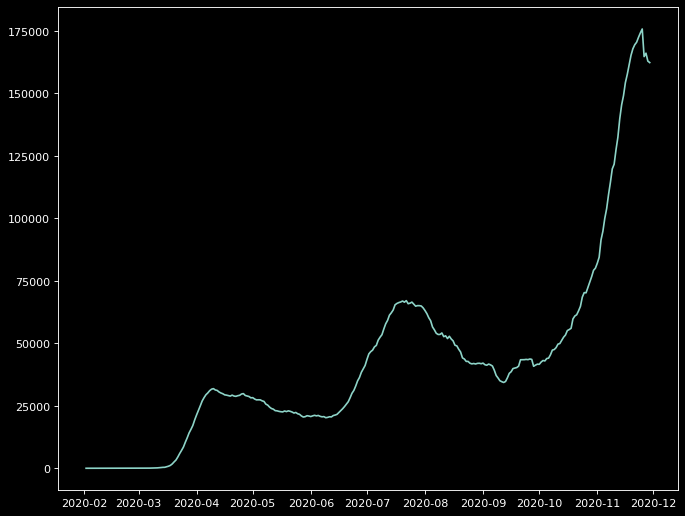

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/1/20


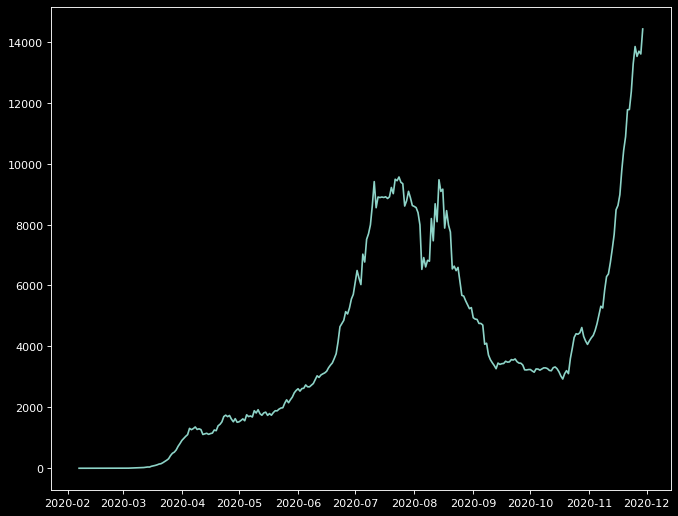

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/1/20


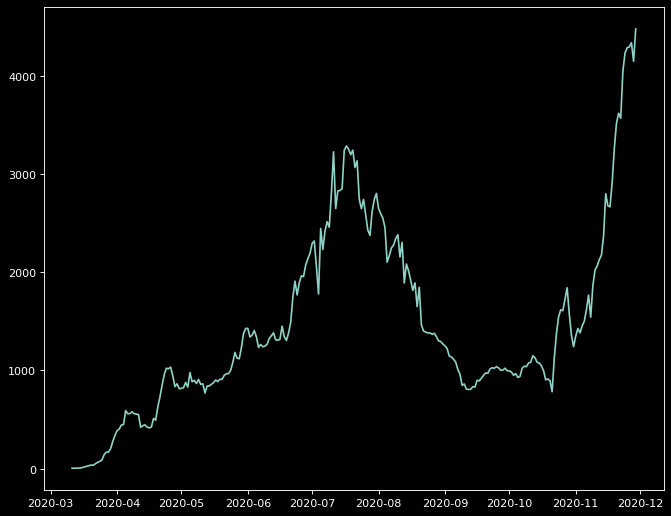

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()